<a href="https://colab.research.google.com/github/taerd/DSIntro/blob/master/cats%26dogs_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score 
import seaborn as sns

In [ ]:
df=pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [ ]:
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [ ]:
#можно было бы разбить данные еще и на тестовые, но они в другой таблице
X_train = df.drop('Вид',axis=1)
y_train=df['Вид']

In [ ]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [ ]:
# Обучаем модель без параметров длины и высоты
X_train=X_train.drop({'Высота','Длина'},axis=1)

In [ ]:
y_train.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [ ]:
y_train=pd.get_dummies(y_train)

In [ ]:
y_train.head()

,котик,собачка
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
y_train=y_train.drop({'котик'},axis=1)

In [ ]:
y_train.head()

,собачка
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train.shape

(1000, 3)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

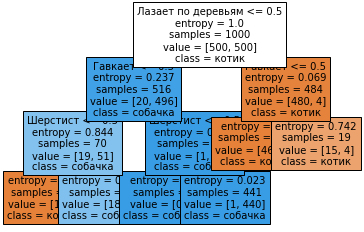

In [ ]:
tree.plot_tree(clf,feature_names=list(X_train),class_names=['котик','собачка'],filled=True,fontsize=10);

In [ ]:
score_data=pd.DataFrame()

In [ ]:
max_depth_values = range(1 , 100)

In [ ]:
for max_depth in  max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)

In [ ]:
score_data.head()

,max_depth,train_score,cross_val_score
0,1,0.976,0.976
0,2,0.976,0.976
0,3,0.977,0.976
0,4,0.977,0.976
0,5,0.977,0.976


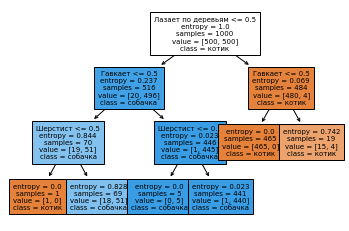

In [ ]:
tree.plot_tree(clf,feature_names=list(X_train),class_names=['котик','собачка'],filled=True,fontsize=7);

In [ ]:
score_data_long=pd.melt(score_data,
                       id_vars='max_depth',
                       value_vars = ['train_score','cross_val_score'],
                       var_name = 'set_type',
                        value_name = 'score')

In [ ]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.976
1,2,train_score,0.976
2,3,train_score,0.977
3,4,train_score,0.977
4,5,train_score,0.977


<AxesSubplot:xlabel='max_depth', ylabel='score'>

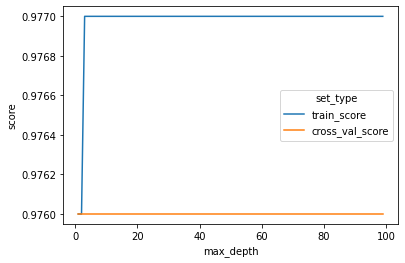

In [ ]:
sns.lineplot(x='max_depth',y='score',hue= 'set_type',data=score_data_long)

In [ ]:
score_data_long.score.max()

0.977

In [ ]:
# max_depth=3
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Осуществляем предсказание на обученной модели
new_data=pd.read_json('cat_dogs_test.txt')

In [ ]:
new_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,28,33.6,1,1,0
2,15,18.0,1,1,0
3,15,18.0,1,1,0
4,19,22.8,1,1,0


In [ ]:
X_test=new_data.drop(['Длина','Высота'],axis=1)

In [ ]:
X_test.head()

,Шерстист,Гавкает,Лазает по деревьям
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
# количество собачек
clf.predict(X_test).sum()

58

In [ ]:
clf.